# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/Users/lisashimano/Documents/UWA Data Analytics Bootcamp/Week 5/Starter_Code 2/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/lisashimano/Documents/UWA Data Analytics Bootcamp/Week 5/Starter_Code 2/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_unique_mice = merged_df['Mouse ID'].nunique()

# Print the number of mice
print(f"The number of unique mice in the merged DataFrame: {num_unique_mice}")

The number of unique mice in the merged DataFrame: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicates = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']), "Mouse ID"].unique()

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print("Duplicate entries (Mouse ID and Timepoint):")
duplicates

Duplicate entries (Mouse ID and Timepoint):


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data = merged_df.loc[merged_df["Mouse ID"]=="g989"]
duplicated_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

# Display the number of rows in the cleaned DataFrame
print("Clean DataFrame after dropping duplicates by Mouse ID:")
cleaned_df

Clean DataFrame after dropping duplicates by Mouse ID:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice_cleaned = cleaned_df['Mouse ID'].nunique()

# Print the number of unique mice in the cleaned DataFrame
print(f"\nNumber of unique mice in the cleaned DataFrame: {num_unique_mice_cleaned}")


Number of unique mice in the cleaned DataFrame: 249


## Summary Statistics

In [7]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped = cleaned_df.groupby('Drug Regimen')

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_volume = grouped['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped['Tumor Volume (mm3)'].var(),
std_dev_tumor_volume = grouped['Tumor Volume (mm3)'].std(),
sem_tumor_volume = grouped['Tumor Volume (mm3)'].sem()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats = grouped['Tumor Volume (mm3)'].agg([
    'mean', 'median', 'var', 'std', 'sem'
])

# Assemble the resulting series into a single summary DataFrame.
print("Summary Statistics Table for Tumor Volume by Drug Regimen:")
summary_stats

Summary Statistics Table for Tumor Volume by Drug Regimen:


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Group the DataFrame by 'Drug Regimen'
grouped = cleaned_df.groupby('Drug Regimen')

# Using the aggregation method, produce the same summary statistics in a single line
# Calculate summary statistics for 'Tumor Volume (mm3)' for each drug regimen
summary_stats = grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Display the summary statistics table
print("Summary Statistics Table for Tumor Volume (mm3) by Drug Regimen:")
summary_stats

Summary Statistics Table for Tumor Volume (mm3) by Drug Regimen:


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

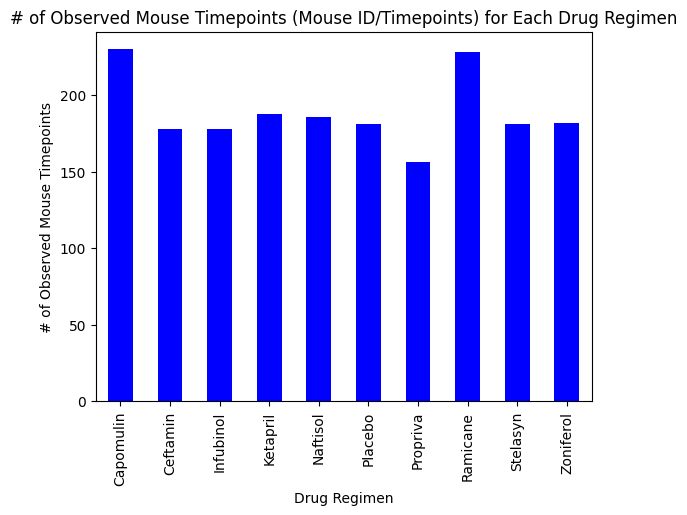

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group the DataFrame by 'Drug Regimen'
grouped = cleaned_df.groupby('Drug Regimen')

# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
row_count = grouped.size()  # .size() returns the count of rows for each group

# Generate a bar chart showing the total number of rows for each drug regimen
row_count.plot(kind='bar', color='blue')

# Add title and labels
plt.title('# of Observed Mouse Timepoints (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Show the plot
plt.show()

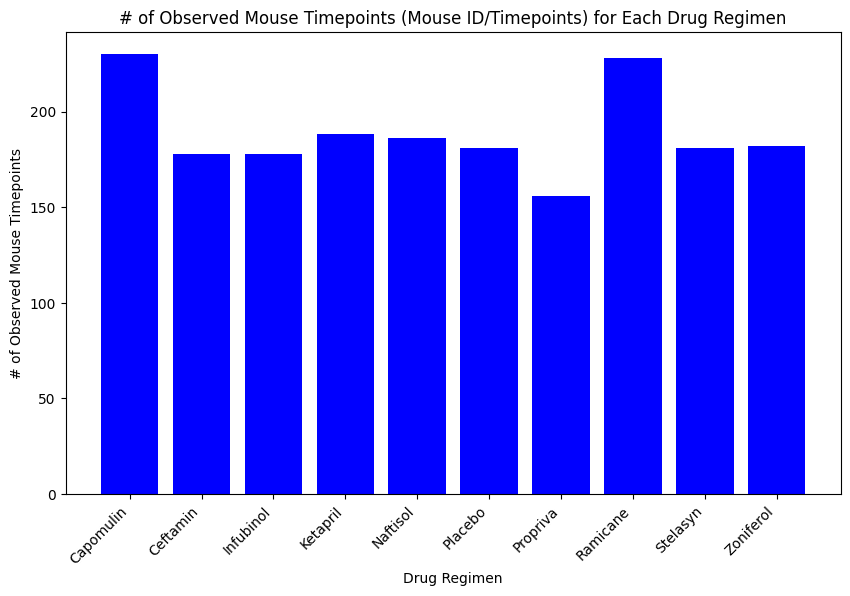

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group the DataFrame by 'Drug Regimen'
grouped = cleaned_df.groupby('Drug Regimen')

# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
row_count = grouped.size()  # .size() returns the count of rows for each group

# Generate a bar chart with Matplotlib's pyplot
plt.figure(figsize=(10, 6))  # Optional: set the figure size
plt.bar(row_count.index, row_count, color='blue')

# Add title and labels
plt.title('# of Observed Mouse Timepoints (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

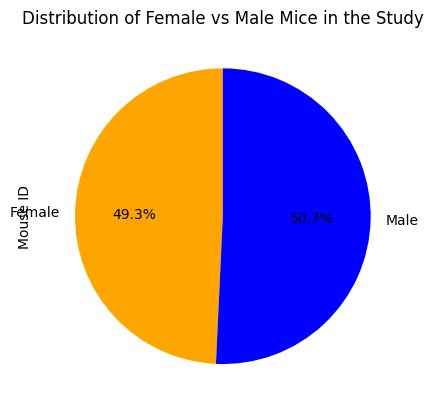

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Group the DataFrame by 'Sex'
grouped_by_sex = cleaned_df.groupby('Sex')

# Calculate the count of mice for each sex
sex_distribution = grouped_by_sex['Mouse ID'].count()

# Calculate the startangle so that male percentage goes above female percentage
# Assuming 'Male' is the first element in value_counts(), rotate so that it starts at top.
startangle = 180  # Adjust the startangle as needed

# Generate a pie chart with the pandas DataFrame.plot() method
sex_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['orange', 'blue'])

# Add title
plt.title('Distribution of Female vs Male Mice in the Study')

# Display the plot
plt.show()

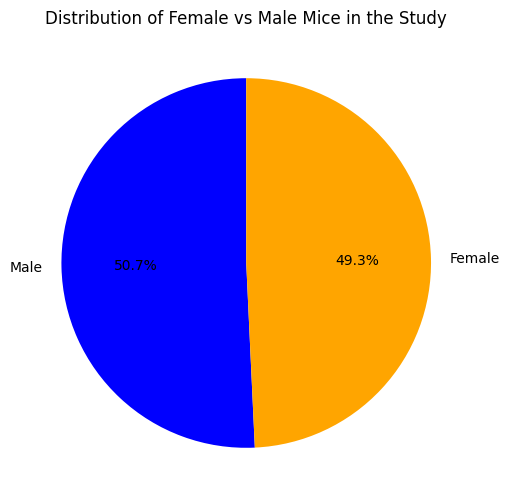

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Calculate the distribution of female versus male mice in the study
sex_distribution = cleaned_df['Sex'].value_counts()

# Generate a pie chart using Matplotlib's pyplot method
plt.figure(figsize=(8, 6))  # Optional: set the figure size
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])

# Add title
plt.title('Distribution of Female vs Male Mice in the Study')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Filter the DataFrame to include only the specified regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = cleaned_df[cleaned_df['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
# Group the DataFrame by 'Mouse ID' and find the greatest (last) timepoint for each mouse
last_timepoint = filtered_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# To do this, we reset the index of 'last_timepoint' so it becomes a column, then merge on 'Mouse ID' and 'Timepoint'
last_timepoint_df = last_timepoint.reset_index()
merged_df = pd.merge(filtered_df, last_timepoint_df, on=['Mouse ID', 'Timepoint'])

In [24]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Iterate over each treatment regimen
for treatment in treatment_regimens:
    # Filter the DataFrame to include only the rows corresponding to the current treatment
    treatment_df = cleaned_df[cleaned_df['Drug Regimen'] == treatment]
    
    # Get the tumor volumes for the current treatment
    tumor_vol = treatment_df['Tumor Volume (mm3)']
    
    # Append the tumor volumes to the list (for plotting later)
    tumor_volumes.append(tumor_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    Q1 = tumor_vol.quantile(0.25)
    Q3 = tumor_vol.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

<Axes: title={'center': 'Tumor Volume (mm3)'}, xlabel='Drug Regimen'>

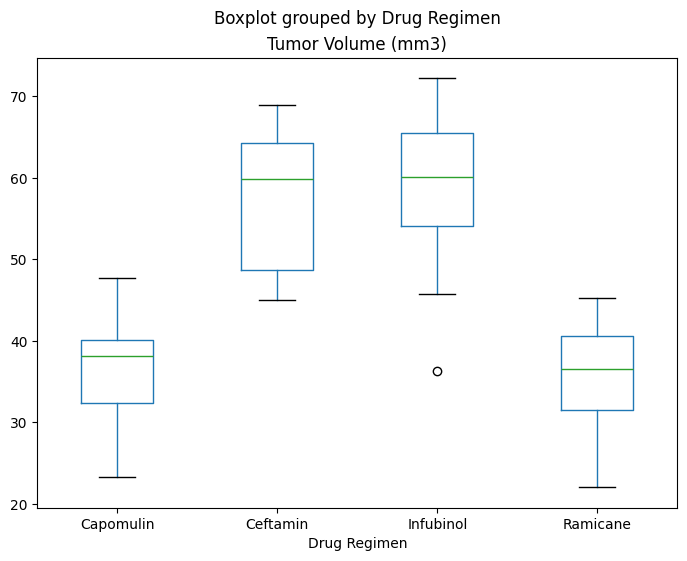

In [35]:
# Group the filtered DataFrame by 'Mouse ID' and 'Drug Regimen'
# Calculate the maximum 'Timepoint' for each mouse
grouped = filtered_df.groupby(['Mouse ID', 'Drug Regimen'])
last_timepoint_df = grouped['Timepoint'].max().reset_index()

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Merge the maximum 'Timepoint' data with the original DataFrame to get final tumor volume for each mouse
final_tumor_volume_df = pd.merge(last_timepoint_df, filtered_df, on=['Mouse ID', 'Drug Regimen', 'Timepoint'])

# Generate a box plot using pandas DataFrame.plot() method
final_tumor_volume_df.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', figsize=(8, 6), grid=False)

## Line and Scatter Plots

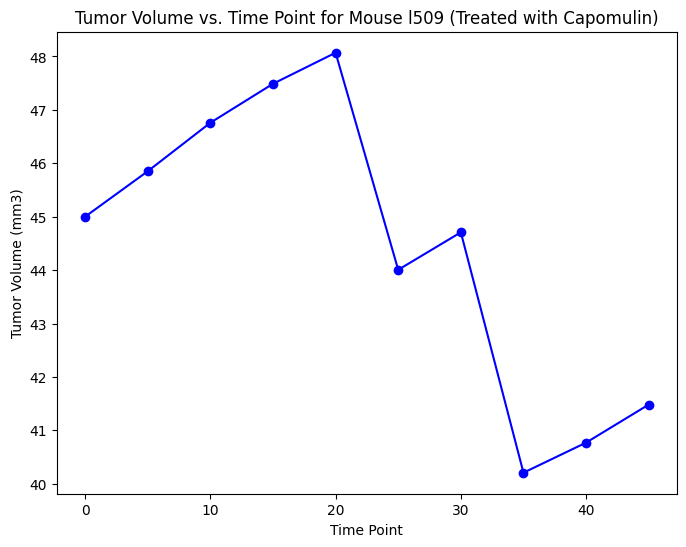

In [37]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Specify the mouse ID and treatment group
mouse_id = 'l509'  # Replace with the desired mouse ID
treatment_group = 'Capomulin'

# Filter the DataFrame to include only the specified mouse treated with Capomulin
mouse_df = cleaned_df[(cleaned_df['Mouse ID'] == mouse_id) & (cleaned_df['Drug Regimen'] == treatment_group)]

# Generate a line plot of tumor volume vs. time point for the specified mouse
plt.figure(figsize=(8, 6))
plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')

# Add title and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Treated with {treatment_group})')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

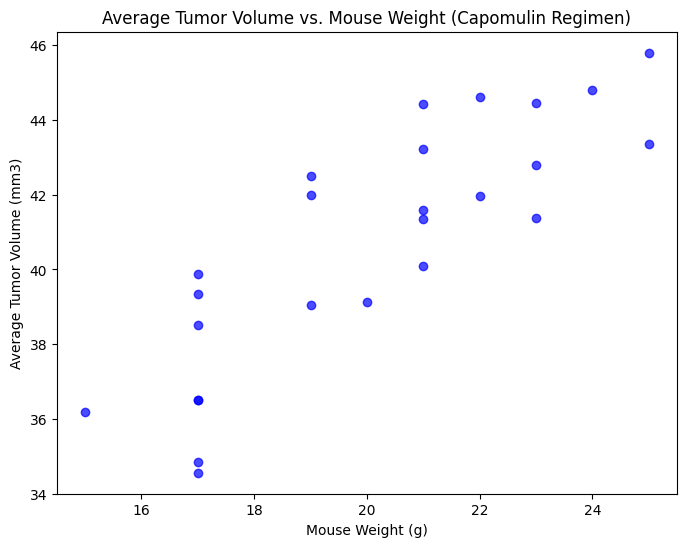

In [38]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the DataFrame to include only data for the Capomulin regimen
capomulin_df = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

# Group the data by mouse weight
grouped = capomulin_df.groupby('Mouse ID')

# Calculate the average tumor volume for each mouse weight
avg_tumor_volume = grouped['Tumor Volume (mm3)'].mean()
mouse_weight = grouped['Weight (g)'].first()

# Create a DataFrame to hold the average tumor volume and mouse weight data
data = pd.DataFrame({'Mouse Weight (g)': mouse_weight, 'Average Tumor Volume (mm3)': avg_tumor_volume})

# Generate a scatter plot of average tumor volume vs. mouse weight
plt.figure(figsize=(8, 6))
plt.scatter(data['Mouse Weight (g)'], data['Average Tumor Volume (mm3)'], color='b', alpha=0.7)

# Add title and labels
plt.title('Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

## Correlation and Regression

In [39]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Filter the DataFrame to include only data for the Capomulin regimen
capomulin_df = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

# Group the data by 'Mouse ID'
grouped = capomulin_df.groupby('Mouse ID')

# Calculate average tumor volume and mouse weight for each mouse
avg_tumor_volume = grouped['Tumor Volume (mm3)'].mean()
mouse_weight = grouped['Weight (g)'].first()

# Calculate the correlation coefficient between mouse weight and average observed tumor volume
correlation_coefficient = avg_tumor_volume.corr(mouse_weight)
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, avg_tumor_volume)

print(f"Linear Regression: slope = {slope:.2f}, intercept = {intercept:.2f}")

# Generate a scatter plot of average tumor volume vs. mouse weight
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, avg_tumor_volume, color='b', alpha=0.7, label='Data points')

# Plot the linear regression line
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='r', label=f"y = {slope:.2f}x + {intercept:.2f}")

# Add title and labels
plt.title('Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

# Show the plot
plt.show()

Correlation Coefficient: 0.84


NameError: name 'linregress' is not defined